- bateau animation
- moyenne glissante ??

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import numpy.ma as ma
import gsw 

from T_S_diagram import ts_diagram

from data_loading import get_LADCP, get_SADCP,get_CTD,get_bathy


In [5]:
# Load the data from the file
year = 2019

SADCP = get_SADCP(year)
LADCP = get_LADCP(year)
CTD = get_CTD(year)
bathy = get_bathy()

proj = ccrs.Mercator(central_longitude=4.5, min_latitude=35.0, max_latitude=45.0)

# Comparing paths for CTD , SADCP and LADCP

In [3]:
fig, ax = plt.subplots(3,1,figsize=(20,20),subplot_kw={'projection': proj})
ax.flatten()

bathy.plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap=cmo.topo,add_colorbar=False)
sc = ax[0].scatter (CTD['longitude'],CTD['latitude'], s=10, c=CTD['idx'], cmap=cmo.thermal, alpha=0.8,  transform=ccrs.PlateCarree())
ax[0].set_extent([0, 12, 38, 45], crs=ccrs.PlateCarree())
ax[0].add_feature(cfeature.LAND)
ax[0].add_feature(cfeature.COASTLINE)
ax[0].add_feature(cfeature.OCEAN)
ax[0].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[0], orientation='vertical', pad=0.02)
cbar.set_label('CTD Stations')
ax[0].set_title('CTD measurements locations')


bathy.plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap=cmo.topo,add_colorbar=False)
sc = ax[1].scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap=cmo.thermal, alpha=0.8, transform=ccrs.PlateCarree())
ax[1].set_extent([0, 12, 38, 45], crs=ccrs.PlateCarree())
ax[1].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.COASTLINE)
ax[1].add_feature(cfeature.OCEAN)
ax[1].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[1], orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax[1].set_title('SADCP measurements locations')

bathy.plot(ax=ax[2], transform=ccrs.PlateCarree(),cmap=cmo.topo,add_colorbar=False)
sc = ax[2].scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'],cmap = cmo.thermal, alpha=0.8,transform=ccrs.PlateCarree())
ax[2].set_extent([0, 12, 38, 45], crs=ccrs.PlateCarree())
ax[2].add_feature(cfeature.LAND)
ax[2].add_feature(cfeature.COASTLINE)
ax[2].add_feature(cfeature.OCEAN)
ax[2].add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax[2], orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')


plt.show()

KeyboardInterrupt: 

# SADCP

## Choosing a path that passes through the front 

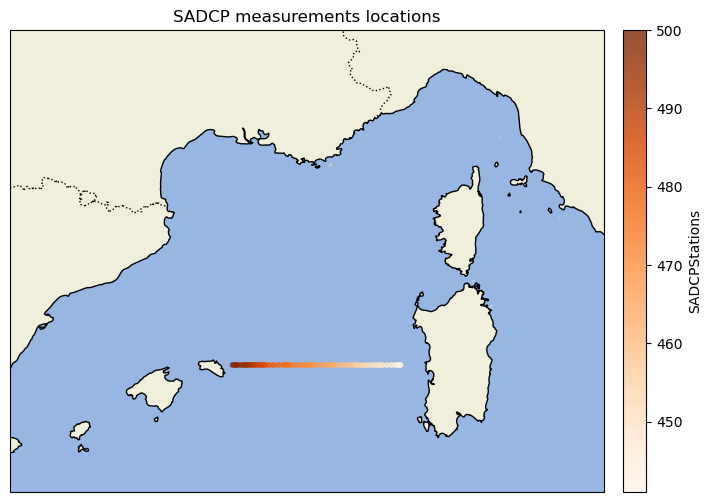

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

N0 = 440
N1 = 500

sc = ax.scatter (SADCP['longitude'][N0:N1],SADCP['latitude'][N0:N1], s=10, c=SADCP['idx'][N0:N1], cmap='Oranges', alpha=0.8,transform=ccrs.PlateCarree())
ax.set_extent([0, 12, 38, 45])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

In [7]:
# ALL the data - the last lign (NaN)
SADCP = SADCP.isel(depth=slice(0,-1)) 

# Mixed layer 
depth_m = SADCP.isel(depth=slice(0,5))

# Zoom in on front
Coupe = SADCP.where((SADCP['idx'] > N0) & (SADCP['idx'] < N1), drop=True)

## Hovmöller Diagrams (speeds / (depth and stations))

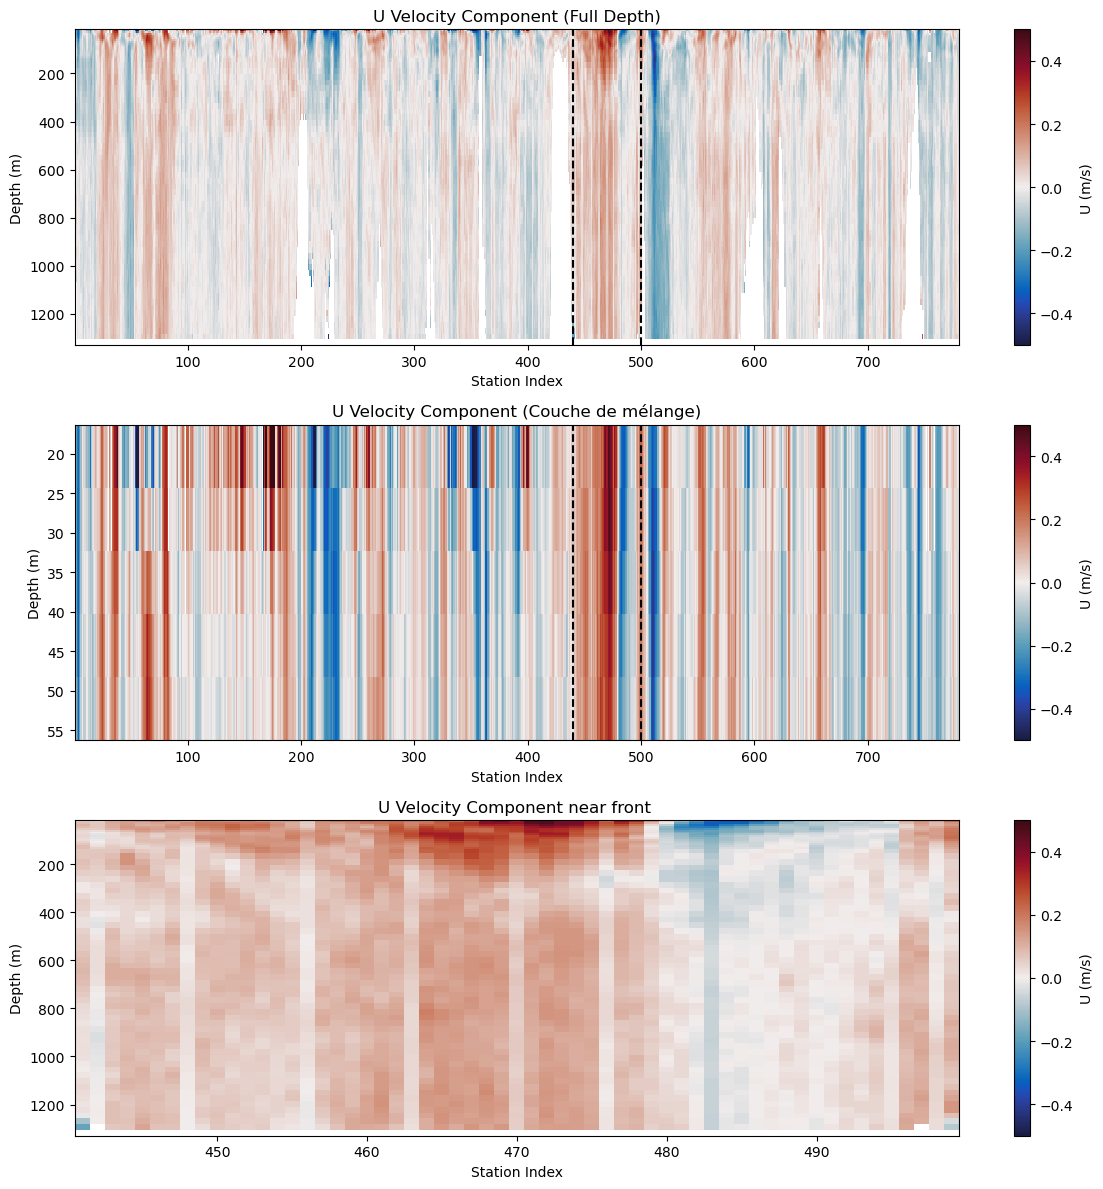

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

c = ax[0].pcolormesh(SADCP['idx'], SADCP['depth'], SADCP['U'], cmap=cmo.balance,vmin = -0.5,vmax = 0.5, shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('U Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('U (m/s)')
ax[0].axvline(x=N0, color='black', linestyle='--')
ax[0].axvline(x=N1, color='black', linestyle='--')
ax[0].invert_yaxis()


c = ax[1].pcolormesh(depth_m['idx'], depth_m['depth'], depth_m['U'], cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('U Velocity Component (Couche de mélange)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('U (m/s)')
ax[1].axvline(x=N0, color='black', linestyle='--')
ax[1].axvline(x=N1, color='black', linestyle='--')
ax[1].invert_yaxis()

c = ax[2].pcolormesh(Coupe['idx'], Coupe['depth'], Coupe['U'], cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[2].set_xlabel('Station Index')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('U Velocity Component near front ')
cbar = fig.colorbar(c, ax=ax[2])
cbar.set_label('U (m/s)')
ax[2].invert_yaxis()



plt.tight_layout()
plt.show()





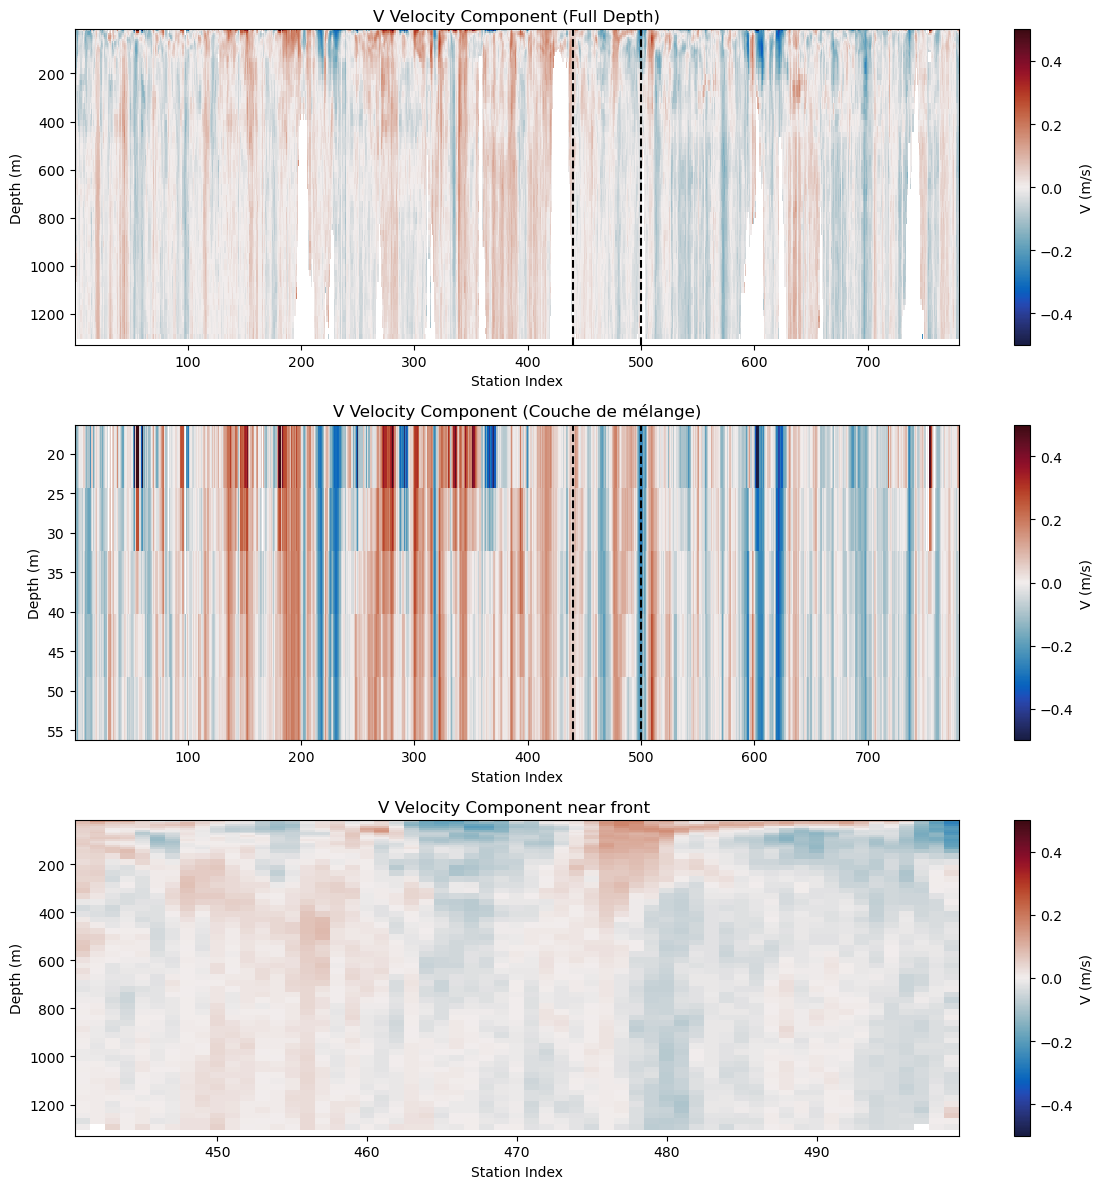

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

c = ax[0].pcolormesh(SADCP['idx'], SADCP['depth'], SADCP['V'], cmap=cmo.balance,vmin = -0.5,vmax = 0.5,shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('V Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('V (m/s)')
ax[0].axvline(x=N0, color='black', linestyle='--')
ax[0].axvline(x=N1, color='black', linestyle='--')
ax[0].invert_yaxis()


c = ax[1].pcolormesh(depth_m['idx'], depth_m['depth'], depth_m['V'], cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('V Velocity Component (Couche de mélange)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('V (m/s)')
ax[1].axvline(x=N0, color='black', linestyle='--')
ax[1].axvline(x=N1, color='black', linestyle='--')
ax[1].invert_yaxis()

c = ax[2].pcolormesh(Coupe['idx'], Coupe['depth'], Coupe['V'], cmap=cmo.balance,vmin = -0.5,vmax = 0.5,  shading='auto')
ax[2].set_xlabel('Station Index')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title('V Velocity Component near front ')
cbar = fig.colorbar(c, ax=ax[2])
cbar.set_label('V (m/s)')
ax[2].invert_yaxis()



plt.tight_layout()
plt.show()





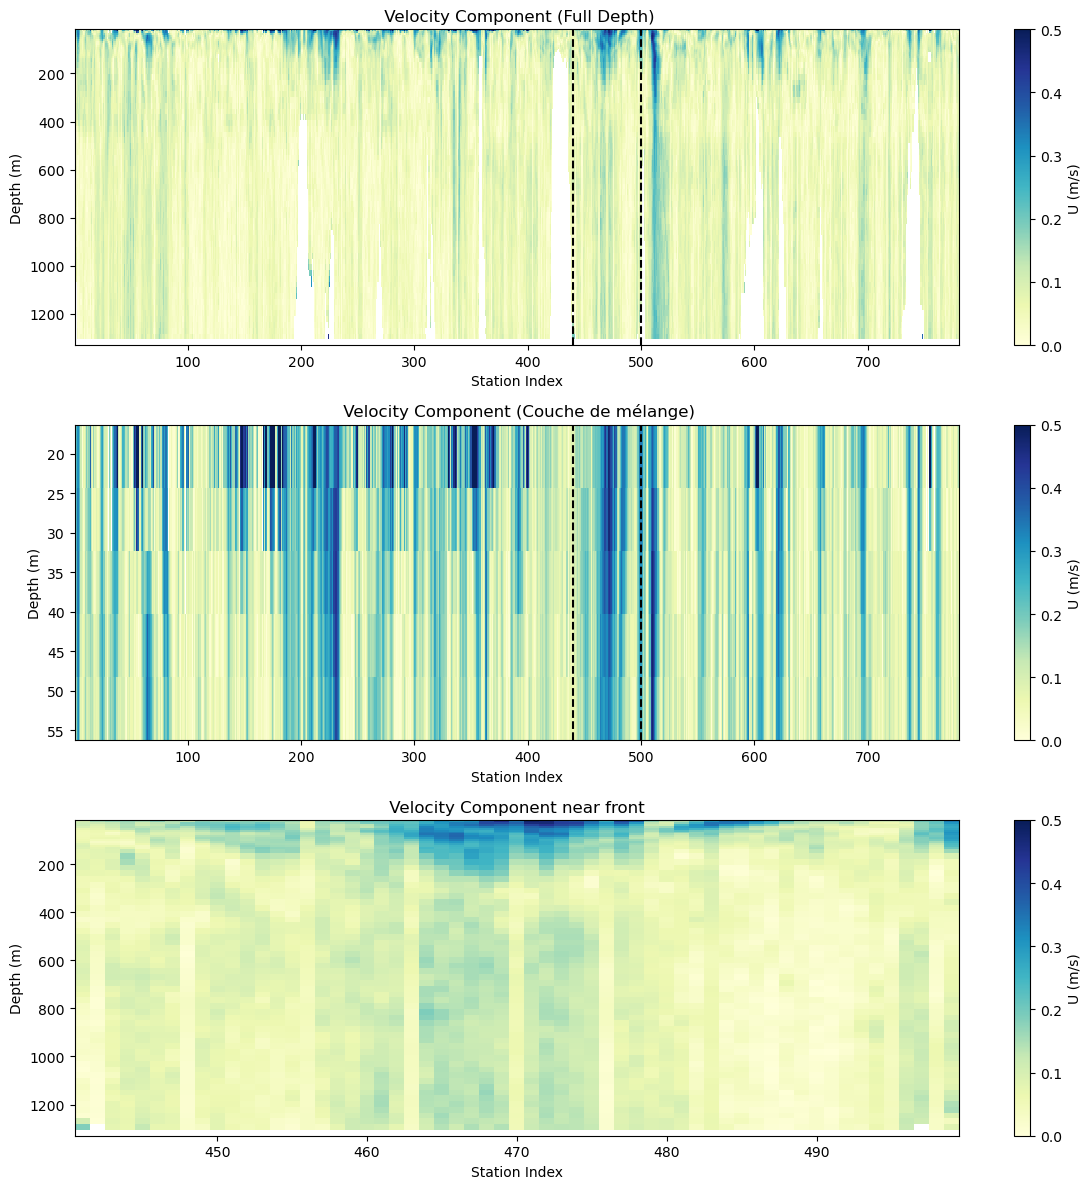

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

c = ax[0].pcolormesh(SADCP['idx'], SADCP['depth'], np.sqrt(SADCP['U']**2 +SADCP['V']**2), cmap='YlGnBu' ,vmin = 0 ,vmax = 0.5, shading='auto')
ax[0].set_xlabel('Station Index')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title(' Velocity Component (Full Depth)')
cbar = fig.colorbar(c, ax=ax[0])
cbar.set_label('U (m/s)')
ax[0].axvline(x=N0, color='black', linestyle='--')
ax[0].axvline(x=N1, color='black', linestyle='--')
ax[0].invert_yaxis()


c = ax[1].pcolormesh(depth_m['idx'], depth_m['depth'], np.sqrt(depth_m['U']**2 + depth_m['V']**2),cmap='YlGnBu',vmin = 0,vmax = 0.5,  shading='auto')
ax[1].set_xlabel('Station Index')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title(' Velocity Component (Couche de mélange)')
cbar = fig.colorbar(c, ax=ax[1])
cbar.set_label('U (m/s)')
ax[1].axvline(x=N0, color='black', linestyle='--')
ax[1].axvline(x=N1, color='black', linestyle='--')
ax[1].invert_yaxis()

c = ax[2].pcolormesh(Coupe['idx'], Coupe['depth'], np.sqrt(Coupe['U']**2+Coupe['V']**2), cmap='YlGnBu',vmin = 0,vmax = 0.5,  shading='auto')
ax[2].set_xlabel('Station Index')
ax[2].set_ylabel('Depth (m)')
ax[2].set_title(' Velocity Component near front ')
cbar = fig.colorbar(c, ax=ax[2])
cbar.set_label('U (m/s)')
ax[2].invert_yaxis()



plt.tight_layout()
plt.show()





## Vecteur parcours 


In [10]:
Fleche = SADCP.isel(depth = slice(0,5) )
Fleched = Fleche.mean('depth')


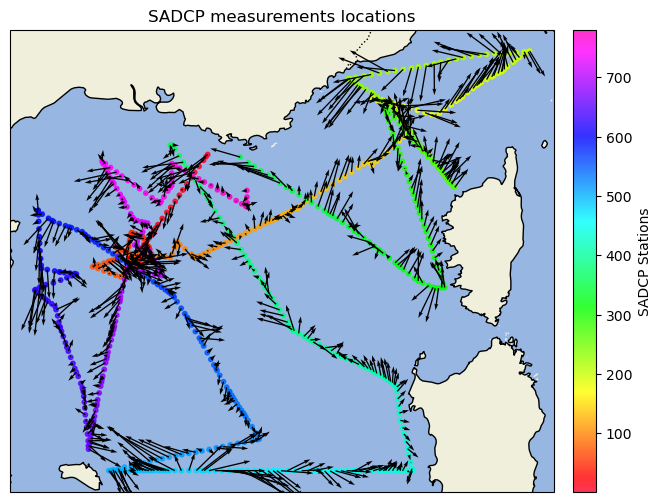

In [11]:

fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleched['longitude'], Fleched['latitude'], Fleched['U'],Fleched['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax.set_title('SADCP measurements locations')

plt.show()

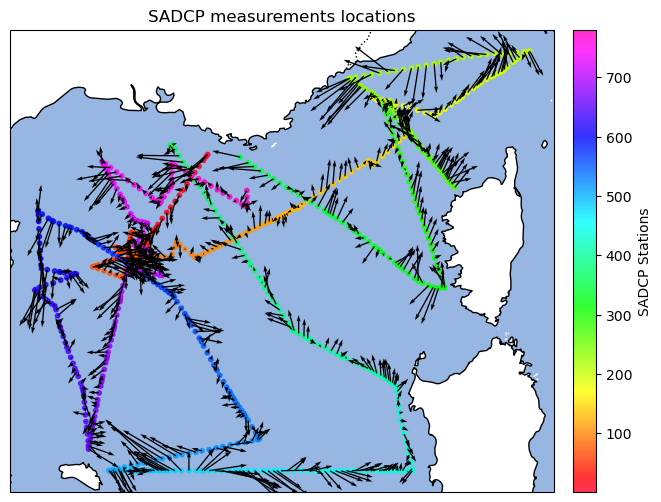

In [12]:
Fleche1 = SADCP.isel(depth = 3 )
fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

sc = ax.scatter (SADCP['longitude'],SADCP['latitude'], s=10, c=SADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleche1['longitude'], Fleche1['latitude'], Fleche1['U'],Fleche1['V'],  transform=ccrs.PlateCarree(), scale=4, color='black')
#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCP Stations')
ax.set_title('SADCP measurements locations')

plt.show()



# LADCP

## Choosing a path that passes through the front

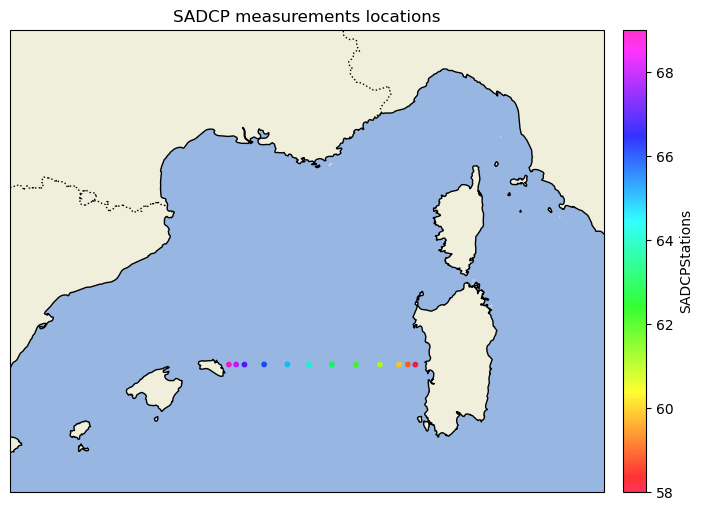

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

N2 = 58
N3 = 70

sc = ax.scatter (LADCP['longitude'][N2:N3],LADCP['latitude'][N2:N3], s=10, c=LADCP['idx'][N2:N3], cmap='gist_rainbow', alpha=0.8,transform=ccrs.PlateCarree())
ax.set_extent([0, 12, 38, 45])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('SADCPStations')
ax.set_title('SADCP measurements locations')

plt.show()

In [ ]:
Coupe1 = LADCP.where((LADCP['idx'] > N2) & (LADCP['idx'] < N3), drop=True)

## Hovmöller Diagrams (speeds / (depth and stations))

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_22255/3657463716.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


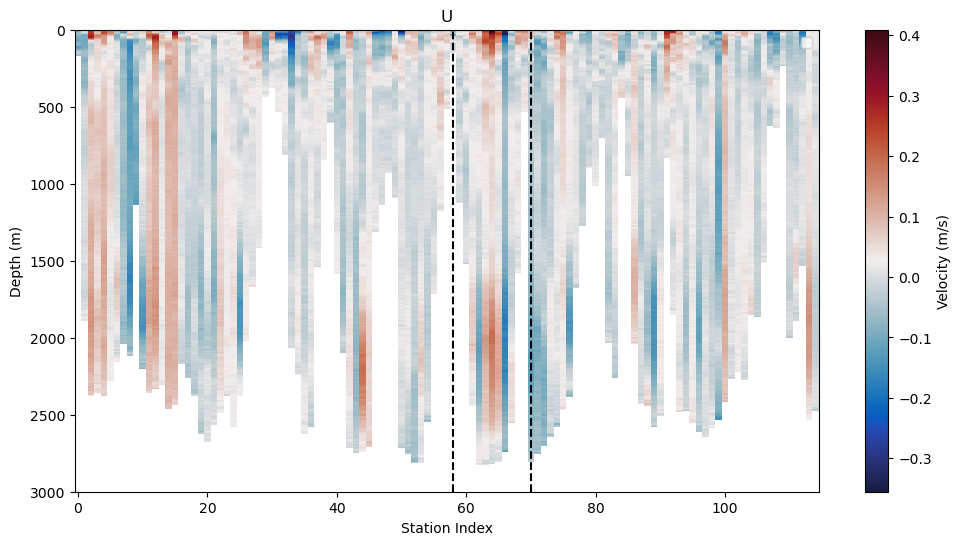

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot for LADCP
c1 = ax1.pcolormesh(LADCP['idx'], LADCP['depth'], LADCP['U'].T, cmap=cmo.balance, shading='nearest')  # Transpose if needed
ax1.set_xlabel('Station Index')
ax1.set_ylabel('Depth (m)')
ax1.set_title('U')
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Velocity (m/s)')
ax1.set_ylim([0, 3000])
ax1.invert_yaxis()


# Add vertical lines at N2 and N3
ax1.axvline(x=N2, color='black', linestyle='--')
ax1.axvline(x=N3, color='black', linestyle='--')
ax1.legend()

plt.show()


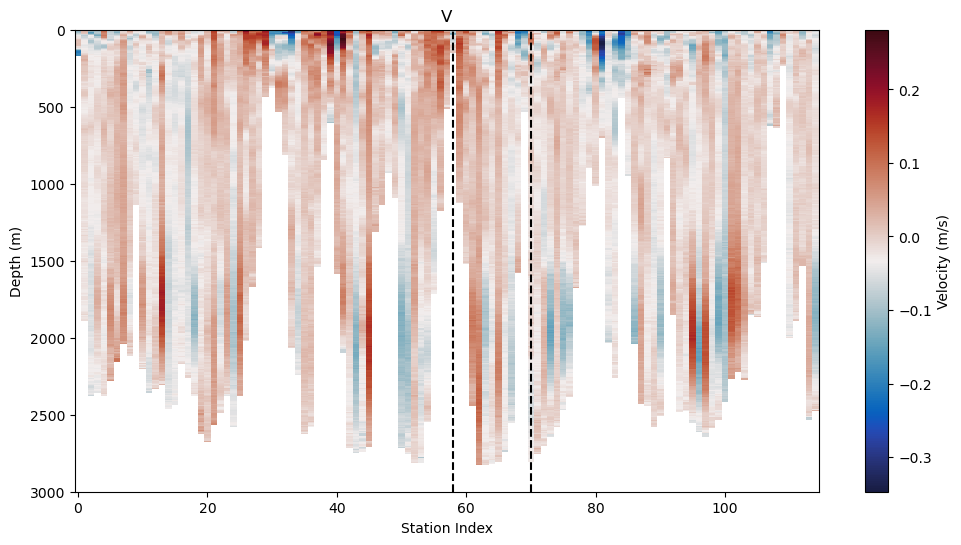

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot for LADCP
c1 = ax1.pcolormesh(LADCP['idx'], LADCP['depth'], LADCP['V'].T, cmap=cmo.balance, shading='nearest')  # Transpose if needed
ax1.set_xlabel('Station Index')
ax1.set_ylabel('Depth (m)')
ax1.set_title('V')
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Velocity (m/s)')
ax1.set_ylim([0, 3000])
ax1.invert_yaxis()

# Add vertical lines at N2 and N3
ax1.axvline(x=N2, color='black', linestyle='--')
ax1.axvline(x=N3, color='black', linestyle='--')

plt.show()


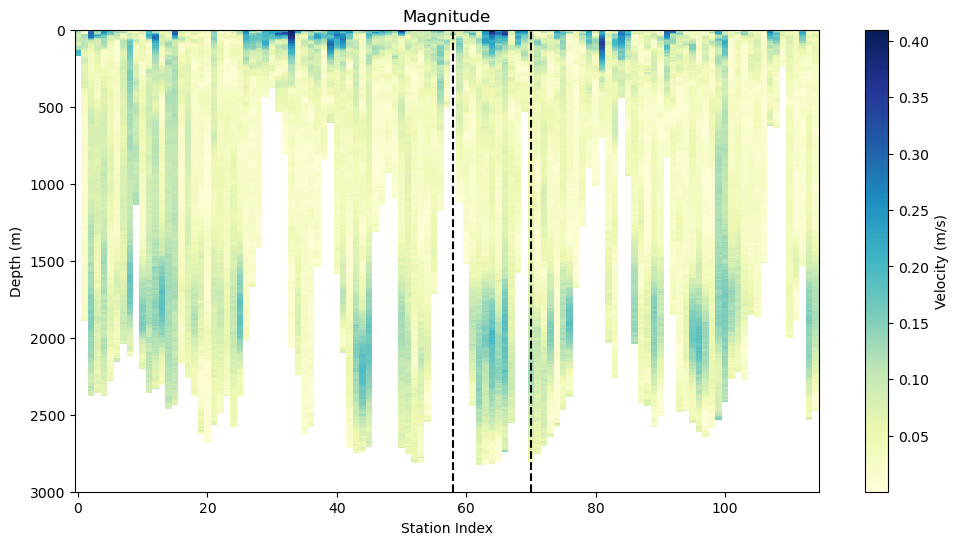

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot for LADCP
c1 = ax1.pcolormesh(LADCP['idx'], LADCP['depth'], np.sqrt(LADCP['V'].T**2 +LADCP['U'].T**2), cmap='YlGnBu', shading='nearest')  # Transpose if needed
ax1.set_xlabel('Station Index')
ax1.set_ylabel('Depth (m)')
ax1.set_title('Magnitude')
cbar1 = fig.colorbar(c1, ax=ax1)
cbar1.set_label('Velocity (m/s)')
ax1.set_ylim([0, 3000])
ax1.invert_yaxis()

# Add vertical lines at N2 and N3
ax1.axvline(x=N2, color='black', linestyle='--')
ax1.axvline(x=N3, color='black', linestyle='--')

plt.show()

## Vecteur 

In [ ]:
Fleche1 = LADCP.isel(depth = slice(0,5) )
Fleched1 = Fleche1.mean('depth')


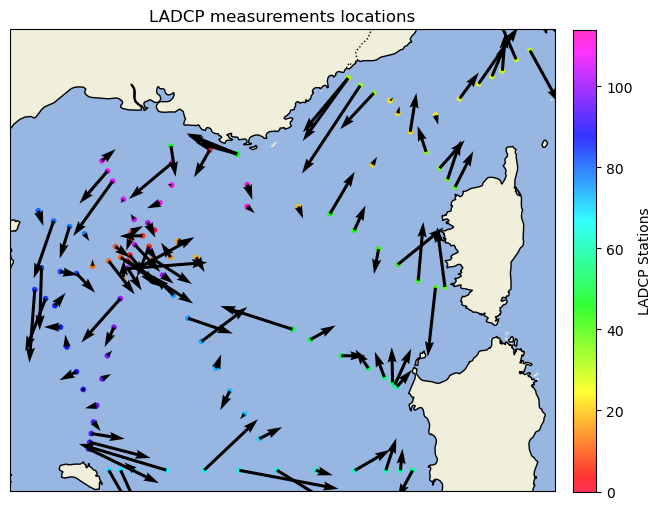

In [ ]:

fig, ax = plt.subplots(1,1,figsize=(12,6),subplot_kw={'projection': proj})

sc = ax.scatter (LADCP['longitude'],LADCP['latitude'], s=10, c=LADCP['idx'], cmap='gist_rainbow', alpha=0.8,  transform = ccrs.PlateCarree())
q = ax.quiver(Fleched1['longitude'], Fleched1['latitude'], Fleched1['U'],Fleched1['V'],  transform=ccrs.PlateCarree(), scale=2, color='black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('LADCP Stations')
ax.set_title('LADCP measurements locations')

plt.show()